# Perform Facial Recognition with Deep Learning in Keras Using CNN

# Input the required libraries

In [1]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
# from keras.utils import np_utils
# import itertools

#  Load the dataset after loading the dataset, you have to normalize every image.

In [2]:
#load dataset
data = np.load('ORL_faces.npz') 

x_train = data['trainX']
x_test = data['testX']
y_train= data['trainY']
y_test= data['testY']

#normalize every image
x_train = np.array(x_train,dtype='float32')/255
x_test = np.array(x_test,dtype='float32')/255

# show the train and test Data format
print('x_train : {}'.format(x_train[:]))
print('Y-train shape: {}'.format(y_train))
print('x_test shape: {}'.format(x_test.shape))

x_train : [[0.1882353  0.19215687 0.1764706  ... 0.18431373 0.18039216 0.18039216]
 [0.23529412 0.23529412 0.24313726 ... 0.1254902  0.13333334 0.13333334]
 [0.15294118 0.17254902 0.20784314 ... 0.11372549 0.10196079 0.11372549]
 ...
 [0.44705883 0.45882353 0.44705883 ... 0.38431373 0.3764706  0.38431373]
 [0.4117647  0.4117647  0.41960785 ... 0.21176471 0.18431373 0.16078432]
 [0.45490196 0.44705883 0.45882353 ... 0.37254903 0.39215687 0.39607844]]
Y-train shape: [ 0  0  0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1  1  1
  2  2  2  2  2  2  2  2  2  2  2  2  3  3  3  3  3  3  3  3  3  3  3  3
  4  4  4  4  4  4  4  4  4  4  4  4  5  5  5  5  5  5  5  5  5  5  5  5
  6  6  6  6  6  6  6  6  6  6  6  6  7  7  7  7  7  7  7  7  7  7  7  7
  8  8  8  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9  9  9  9  9  9  9
 10 10 10 10 10 10 10 10 10 10 10 10 11 11 11 11 11 11 11 11 11 11 11 11
 12 12 12 12 12 12 12 12 12 12 12 12 13 13 13 13 13 13 13 13 13 13 13 13
 14 14 14 14 14 14 1

# Split the dataset

In [10]:
x_train, x_valid, y_train, y_valid= train_test_split( x_train, y_train, test_size=.15, random_state=42,)

#  Transform the images to equal sizes to feed in CNN

In [11]:
im_rows=112
im_cols=92
batch_size=512
im_shape=(im_rows, im_cols, 1)

#change the size of images
x_train = x_train.reshape(x_train.shape[0], *im_shape)
x_test = x_test.reshape(x_test.shape[0], *im_shape)
x_valid = x_valid.reshape(x_valid.shape[0], *im_shape)

print('x_train shape: {}'.format(y_train.shape[0]))
print('x_test shape: {}'.format(y_test.shape))

x_train shape: 173
x_test shape: (160,)


# Build a CNN model that has 3 main layers:

    i. Convolutional Layer
    ii. Pooling Layer
    iii. Fully Connected Layer

In [12]:

#filters= the depth of output image or kernels

cnn_model= Sequential([
    Conv2D(filters=36, kernel_size=7, activation='relu', input_shape= im_shape),
    MaxPooling2D(pool_size=2),
    Conv2D(filters=54, kernel_size=5, activation='relu', input_shape= im_shape),
    MaxPooling2D(pool_size=2),
    Flatten(),
    Dense(2024, activation='relu'),
     Dropout(0.5),
    Dense(1024, activation='relu'),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dropout(0.5),
    #20 is the number of outputs
    Dense(20, activation='softmax')  
])

cnn_model.compile(
    loss='sparse_categorical_crossentropy',#'categorical_crossentropy',
    optimizer=Adam(learning_rate=0.0001),
    metrics=['accuracy']
)

In [13]:
cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 106, 86, 36)       1800      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 53, 43, 36)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 49, 39, 54)        48654     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 24, 19, 54)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 24624)             0         
                                                                 
 dense_4 (Dense)             (None, 2024)             

# Train the model

In [14]:
history=cnn_model.fit(
    np.array(x_train), np.array(y_train), batch_size=512,
    epochs=250, verbose=2,
    validation_data=(np.array(x_valid),np.array(y_valid)),
)

Epoch 1/250
1/1 - 5s - loss: 3.0111 - accuracy: 0.0405 - val_loss: 2.9887 - val_accuracy: 0.1935 - 5s/epoch - 5s/step
Epoch 2/250
1/1 - 3s - loss: 3.0089 - accuracy: 0.0694 - val_loss: 2.9958 - val_accuracy: 0.1613 - 3s/epoch - 3s/step
Epoch 3/250
1/1 - 3s - loss: 2.9923 - accuracy: 0.0636 - val_loss: 3.0050 - val_accuracy: 0.0000e+00 - 3s/epoch - 3s/step
Epoch 4/250
1/1 - 3s - loss: 2.9909 - accuracy: 0.0636 - val_loss: 3.0174 - val_accuracy: 0.0000e+00 - 3s/epoch - 3s/step
Epoch 5/250
1/1 - 3s - loss: 2.9902 - accuracy: 0.0462 - val_loss: 3.0245 - val_accuracy: 0.0000e+00 - 3s/epoch - 3s/step
Epoch 6/250
1/1 - 3s - loss: 2.9809 - accuracy: 0.0809 - val_loss: 3.0282 - val_accuracy: 0.0645 - 3s/epoch - 3s/step
Epoch 7/250
1/1 - 3s - loss: 3.0108 - accuracy: 0.0462 - val_loss: 3.0288 - val_accuracy: 0.0323 - 3s/epoch - 3s/step
Epoch 8/250
1/1 - 3s - loss: 2.9724 - accuracy: 0.0520 - val_loss: 3.0287 - val_accuracy: 0.0323 - 3s/epoch - 3s/step
Epoch 9/250
1/1 - 3s - loss: 2.9562 - accura

Epoch 70/250
1/1 - 3s - loss: 1.1854 - accuracy: 0.6879 - val_loss: 1.1222 - val_accuracy: 0.7097 - 3s/epoch - 3s/step
Epoch 71/250
1/1 - 3s - loss: 1.0988 - accuracy: 0.7341 - val_loss: 1.0593 - val_accuracy: 0.7419 - 3s/epoch - 3s/step
Epoch 72/250
1/1 - 3s - loss: 1.1329 - accuracy: 0.7168 - val_loss: 1.0037 - val_accuracy: 0.7419 - 3s/epoch - 3s/step
Epoch 73/250
1/1 - 3s - loss: 1.0855 - accuracy: 0.6879 - val_loss: 0.9582 - val_accuracy: 0.7419 - 3s/epoch - 3s/step
Epoch 74/250
1/1 - 3s - loss: 1.0034 - accuracy: 0.6994 - val_loss: 0.9311 - val_accuracy: 0.7419 - 3s/epoch - 3s/step
Epoch 75/250
1/1 - 3s - loss: 0.9808 - accuracy: 0.7168 - val_loss: 0.8929 - val_accuracy: 0.7097 - 3s/epoch - 3s/step
Epoch 76/250
1/1 - 3s - loss: 0.9072 - accuracy: 0.7283 - val_loss: 0.8413 - val_accuracy: 0.7419 - 3s/epoch - 3s/step
Epoch 77/250
1/1 - 3s - loss: 0.9493 - accuracy: 0.7052 - val_loss: 0.7887 - val_accuracy: 0.7742 - 3s/epoch - 3s/step
Epoch 78/250
1/1 - 3s - loss: 0.8141 - accuracy:

Epoch 139/250
1/1 - 3s - loss: 0.1094 - accuracy: 0.9595 - val_loss: 0.2267 - val_accuracy: 0.8710 - 3s/epoch - 3s/step
Epoch 140/250
1/1 - 3s - loss: 0.0772 - accuracy: 0.9711 - val_loss: 0.2134 - val_accuracy: 0.9032 - 3s/epoch - 3s/step
Epoch 141/250
1/1 - 3s - loss: 0.0595 - accuracy: 0.9827 - val_loss: 0.2005 - val_accuracy: 0.9032 - 3s/epoch - 3s/step
Epoch 142/250
1/1 - 3s - loss: 0.0771 - accuracy: 0.9827 - val_loss: 0.1934 - val_accuracy: 0.9355 - 3s/epoch - 3s/step
Epoch 143/250
1/1 - 3s - loss: 0.0636 - accuracy: 0.9827 - val_loss: 0.1850 - val_accuracy: 0.9355 - 3s/epoch - 3s/step
Epoch 144/250
1/1 - 3s - loss: 0.0980 - accuracy: 0.9711 - val_loss: 0.1861 - val_accuracy: 0.9355 - 3s/epoch - 3s/step
Epoch 145/250
1/1 - 3s - loss: 0.0734 - accuracy: 0.9827 - val_loss: 0.1847 - val_accuracy: 0.9355 - 3s/epoch - 3s/step
Epoch 146/250
1/1 - 3s - loss: 0.0922 - accuracy: 0.9711 - val_loss: 0.1875 - val_accuracy: 0.9355 - 3s/epoch - 3s/step
Epoch 147/250
1/1 - 3s - loss: 0.0674 - 

Epoch 208/250
1/1 - 3s - loss: 0.0147 - accuracy: 1.0000 - val_loss: 0.2743 - val_accuracy: 0.9032 - 3s/epoch - 3s/step
Epoch 209/250
1/1 - 3s - loss: 0.0386 - accuracy: 0.9827 - val_loss: 0.2844 - val_accuracy: 0.9032 - 3s/epoch - 3s/step
Epoch 210/250
1/1 - 3s - loss: 0.0429 - accuracy: 0.9769 - val_loss: 0.2963 - val_accuracy: 0.9032 - 3s/epoch - 3s/step
Epoch 211/250
1/1 - 3s - loss: 0.0266 - accuracy: 0.9942 - val_loss: 0.3074 - val_accuracy: 0.9032 - 3s/epoch - 3s/step
Epoch 212/250
1/1 - 3s - loss: 0.0162 - accuracy: 1.0000 - val_loss: 0.3159 - val_accuracy: 0.9032 - 3s/epoch - 3s/step
Epoch 213/250
1/1 - 3s - loss: 0.0354 - accuracy: 0.9884 - val_loss: 0.3199 - val_accuracy: 0.9032 - 3s/epoch - 3s/step
Epoch 214/250
1/1 - 3s - loss: 0.0186 - accuracy: 0.9942 - val_loss: 0.3209 - val_accuracy: 0.9032 - 3s/epoch - 3s/step
Epoch 215/250
1/1 - 3s - loss: 0.0151 - accuracy: 1.0000 - val_loss: 0.3198 - val_accuracy: 0.9032 - 3s/epoch - 3s/step
Epoch 216/250
1/1 - 3s - loss: 0.0149 - 

In [15]:

# Evaluate the test data
# We obtain our accuracy score using the evalute function
score = cnn_model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.38566169142723083
Test accuracy: 0.9437500238418579


# Plot the result

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


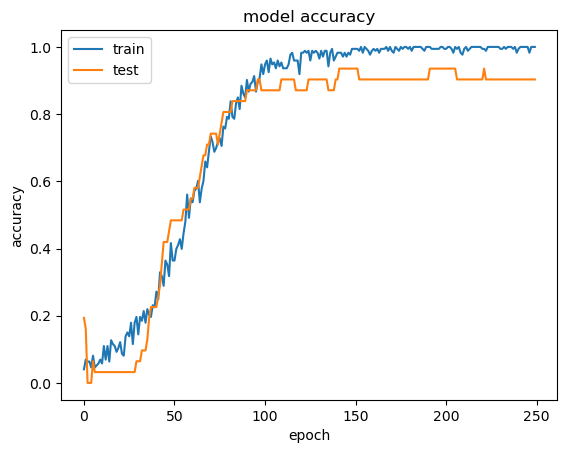

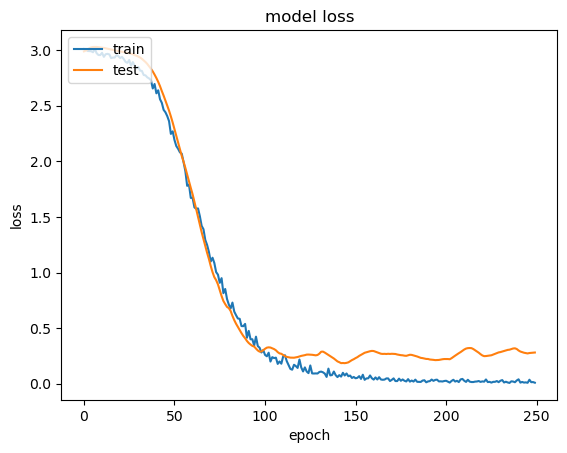

In [16]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

